# This notebook shows implementation autoencoders and use on MNIST dataset

Useful resource: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from datetime import datetime

In [2]:
np.random.seed(42)

## Load and prepare image data

In [3]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [4]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

## Build a very simple autoencoder model

In [5]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(32, activation='relu')(input_layer)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 25ms/step - loss: 0.5802 - val_loss: 0.3902
Epoch 2/30
24/24 [==============================] - 0s 20ms/step - loss: 0.3189 - val_loss: 0.2827
Epoch 3/30
24/24 [==============================] - 1s 22ms/step - loss: 0.2747 - val_loss: 0.2641
Epoch 4/30
24/24 [==============================] - 1s 23ms/step - loss: 0.2572 - val_loss: 0.2471
Epoch 5/30
24/24 [==============================] - 1s 21ms/step - loss: 0.2406 - val_loss: 0.2308
Epoch 6/30
24/24 [==============================] - 0s 21ms/step - loss: 0.2251 - val_loss: 0.2161
Epoch 7/30
24/24 [==============================] - 1s 22ms/step - loss: 0.2116 - val_loss: 0.2039
Epoch 8/30
24/24 [==============================] - 1s 21ms/step - loss: 0.2006 - val_loss: 0.1943
Epoch 9/30
24/24 [==============================] - 1s 21ms/step - loss: 0.1920 - val_loss: 0.1866
Epoch 10/30
24/24 [==============================] - 1s 21ms/step - loss: 0.1849 - val_loss: 0.1801
Epoch 11/

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

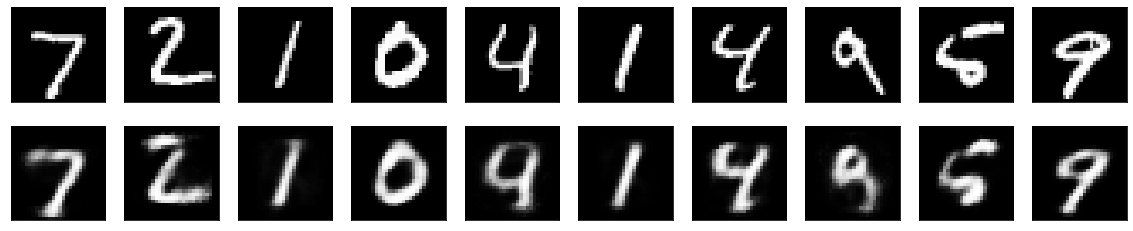

In [8]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Add sparsity to the simple autoencoder

In [9]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 25ms/step - loss: 0.6088 - val_loss: 0.4277
Epoch 2/30
24/24 [==============================] - 1s 24ms/step - loss: 0.3379 - val_loss: 0.2929
Epoch 3/30
24/24 [==============================] - 1s 26ms/step - loss: 0.2832 - val_loss: 0.2710
Epoch 4/30
24/24 [==============================] - 1s 25ms/step - loss: 0.2629 - val_loss: 0.2515
Epoch 5/30
24/24 [==============================] - 1s 25ms/step - loss: 0.2445 - val_loss: 0.2344
Epoch 6/30
24/24 [==============================] - 1s 23ms/step - loss: 0.2289 - val_loss: 0.2206
Epoch 7/30
24/24 [==============================] - 1s 23ms/step - loss: 0.2165 - val_loss: 0.2098
Epoch 8/30
24/24 [==============================] - 1s 23ms/step - loss: 0.2068 - val_loss: 0.2012
Epoch 9/30
24/24 [==============================] - 1s 26ms/step - loss: 0.1990 - val_loss: 0.1941
Epoch 10/30
24/24 [==============================] - 1s 26ms/step - loss: 0.1924 - val_loss: 0.1880
Epoch 11/

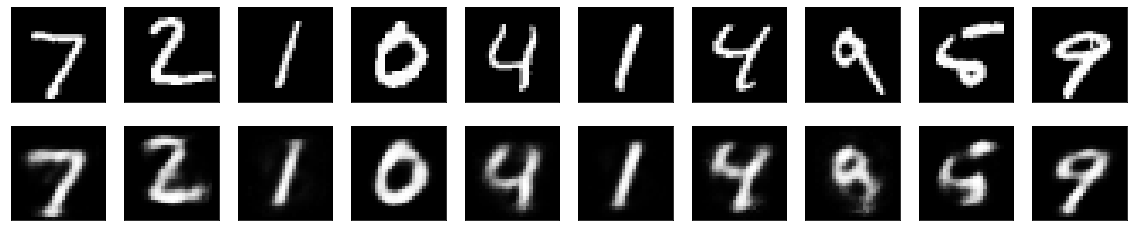

In [11]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Adding layers to autoencoder

In [12]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]  # decoder layers of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 36ms/step - loss: 0.5252 - val_loss: 0.3055
Epoch 2/30
24/24 [==============================] - 1s 33ms/step - loss: 0.2816 - val_loss: 0.2662
Epoch 3/30
24/24 [==============================] - 1s 34ms/step - loss: 0.2581 - val_loss: 0.2487
Epoch 4/30
24/24 [==============================] - 1s 36ms/step - loss: 0.2421 - val_loss: 0.2312
Epoch 5/30
24/24 [==============================] - 1s 37ms/step - loss: 0.2219 - val_loss: 0.2091
Epoch 6/30
24/24 [==============================] - 1s 34ms/step - loss: 0.2031 - val_loss: 0.1923
Epoch 7/30
24/24 [==============================] - 1s 37ms/step - loss: 0.1858 - val_loss: 0.1771
Epoch 8/30
24/24 [==============================] - 1s 37ms/step - loss: 0.1737 - val_loss: 0.1675
Epoch 9/30
24/24 [==============================] - 1s 38ms/step - loss: 0.1652 - val_loss: 0.1599
Epoch 10/30
24/24 [==============================] - 1s 38ms/step - loss: 0.1578 - val_loss: 0.1529
Epoch 11/

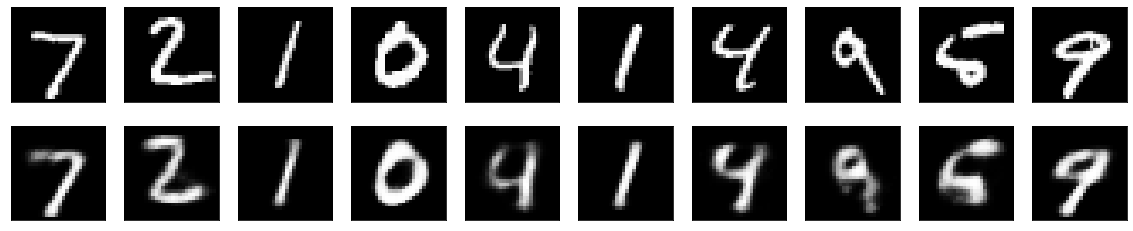

In [14]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Let's try a model with larger layers

This architecture came from here: https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

In [15]:
## input layer
input_layer = Input(shape=(784,))   # 28*28

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_12 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_14 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_15 (Dense)             (None, 1000)            

In [16]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x_train, x_train, epochs=30, batch_size=2048, validation_data=(x_validation, x_validation), callbacks=[early_stopping])

Epoch 1/30
24/24 [==============================] - 7s 297ms/step - loss: 0.0725 - val_loss: 0.0652
Epoch 2/30
24/24 [==============================] - 7s 298ms/step - loss: 0.0632 - val_loss: 0.0594
Epoch 3/30
24/24 [==============================] - 7s 289ms/step - loss: 0.0569 - val_loss: 0.0533
Epoch 4/30
24/24 [==============================] - 7s 288ms/step - loss: 0.0508 - val_loss: 0.0468
Epoch 5/30
24/24 [==============================] - 7s 291ms/step - loss: 0.0434 - val_loss: 0.0402
Epoch 6/30
24/24 [==============================] - 7s 290ms/step - loss: 0.0382 - val_loss: 0.0357
Epoch 7/30
24/24 [==============================] - 7s 295ms/step - loss: 0.0339 - val_loss: 0.0320
Epoch 8/30
24/24 [==============================] - 7s 294ms/step - loss: 0.0309 - val_loss: 0.0297
Epoch 9/30
24/24 [==============================] - 7s 291ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 10/30
24/24 [==============================] - 7s 303ms/step - loss: 0.0272 - val_loss: 0.0262

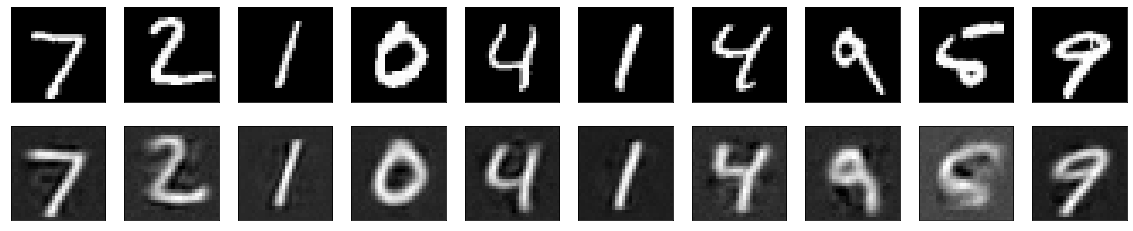

In [17]:
predictions = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Hmmmm, what's going on? A more complicated model doesn't seem to be doing as well as a very simple autoencoder

## Let's try adding convolution

In [18]:
# shape back into image matrices
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
input_layer = Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation))

Epoch 1/30
24/24 [==============================] - 15s 609ms/step - loss: 0.5633 - val_loss: 0.4541
Epoch 2/30
24/24 [==============================] - 16s 648ms/step - loss: 0.3918 - val_loss: 0.3107
Epoch 3/30
24/24 [==============================] - 16s 661ms/step - loss: 0.2686 - val_loss: 0.2385
Epoch 4/30
24/24 [==============================] - 16s 658ms/step - loss: 0.2274 - val_loss: 0.2172
Epoch 5/30
24/24 [==============================] - 16s 650ms/step - loss: 0.2087 - val_loss: 0.2005
Epoch 6/30
24/24 [==============================] - 16s 646ms/step - loss: 0.1939 - val_loss: 0.1876
Epoch 7/30
24/24 [==============================] - 15s 644ms/step - loss: 0.1820 - val_loss: 0.1770
Epoch 8/30
24/24 [==============================] - 15s 643ms/step - loss: 0.1729 - val_loss: 0.1695
Epoch 9/30
24/24 [==============================] - 16s 662ms/step - loss: 0.1664 - val_loss: 0.1639
Epoch 10/30
24/24 [==============================] - 16s 659ms/step - loss: 0.1613 - val_lo

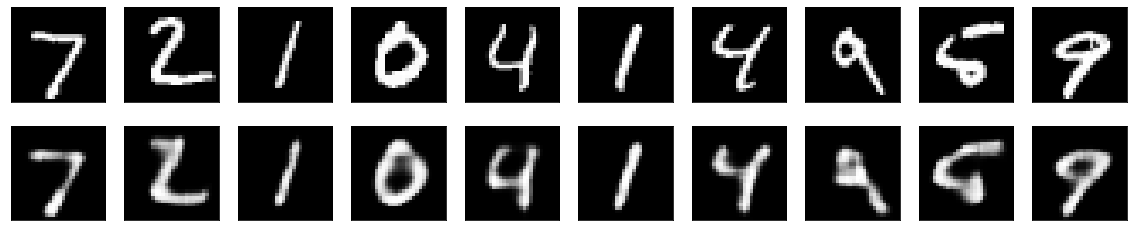

In [21]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Image denoising with autoencoders

In [54]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

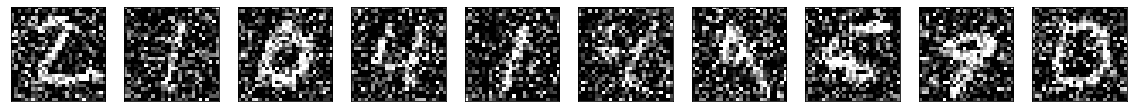

In [55]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [56]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [57]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 27s 1s/step - loss: 0.5286 - val_loss: 0.4290
Epoch 2/30
24/24 [==============================] - 27s 1s/step - loss: 0.3304 - val_loss: 0.2417
Epoch 3/30
24/24 [==============================] - 27s 1s/step - loss: 0.2188 - val_loss: 0.1992
Epoch 4/30
24/24 [==============================] - 27s 1s/step - loss: 0.1860 - val_loss: 0.1742
Epoch 5/30
24/24 [==============================] - 27s 1s/step - loss: 0.1662 - val_loss: 0.1586
Epoch 6/30
24/24 [==============================] - 27s 1s/step - loss: 0.1533 - val_loss: 0.1484
Epoch 7/30
24/24 [==============================] - 27s 1s/step - loss: 0.1452 - val_loss: 0.1422
Epoch 8/30
24/24 [==============================] - 27s 1s/step - loss: 0.1394 - val_loss: 0.1368
Epoch 9/30
24/24 [==============================] - 27s 1s/step - loss: 0.1349 - val_loss: 0.1327
Epoch 10/30
24/24 [==============================] - 27s 1s/step - loss: 0.1308 - val_loss: 0.1304
Epoch 11/30
24/24 [

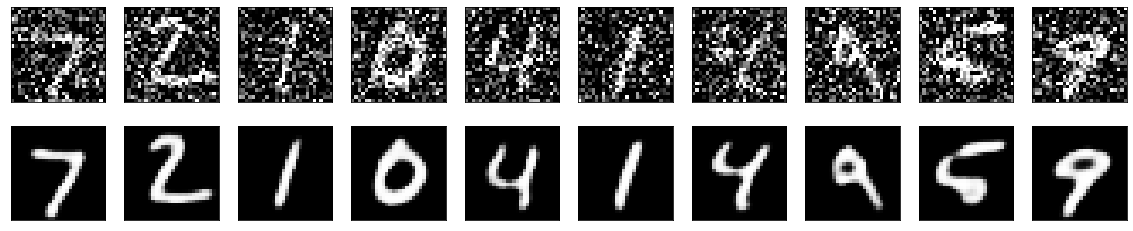

In [58]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Variational autoencoder

In [59]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_validation_vae = x_validation.reshape((len(x_validation), np.prod(x_validation.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [60]:
input_layer = Input(shape=(784,))

h = layers.Dense(64, activation='relu')(input_layer)
z_mean = layers.Dense(2)(h)
z_log_sigma = layers.Dense(2)(h)

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2),
                              mean=0., stddev=0.1)
    return z_mean + backend.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [61]:
# encoder part
encoder = keras.Model(input_layer, [z_mean, z_log_sigma, z], name='encoder')

# decoder part
latent_inputs = keras.Input(shape=(2,), name='z_sampling')
x = layers.Dense(64, activation='relu')(latent_inputs)
outputs = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# VAE model
outputs = decoder(encoder(input_layer)[2])
vae = keras.Model(input_layer, outputs, name='vae')

vae.compile(optimizer='adam', loss='binary_crossentropy')

In [62]:
vae.fit(x_train_vae, x_train_vae,
        epochs=30,
        batch_size=2048,
        validation_data=(x_validation_vae, x_validation_vae))

Epoch 1/30
24/24 [==============================] - 1s 30ms/step - loss: 0.5707 - val_loss: 0.3585
Epoch 2/30
24/24 [==============================] - 1s 31ms/step - loss: 0.3061 - val_loss: 0.2836
Epoch 3/30
24/24 [==============================] - 1s 31ms/step - loss: 0.2776 - val_loss: 0.2722
Epoch 4/30
24/24 [==============================] - 1s 28ms/step - loss: 0.2681 - val_loss: 0.2638
Epoch 5/30
24/24 [==============================] - 1s 26ms/step - loss: 0.2609 - val_loss: 0.2584
Epoch 6/30
24/24 [==============================] - 1s 25ms/step - loss: 0.2564 - val_loss: 0.2544
Epoch 7/30
24/24 [==============================] - 1s 26ms/step - loss: 0.2525 - val_loss: 0.2507
Epoch 8/30
24/24 [==============================] - 1s 26ms/step - loss: 0.2492 - val_loss: 0.2477
Epoch 9/30
24/24 [==============================] - 1s 26ms/step - loss: 0.2465 - val_loss: 0.2450
Epoch 10/30
24/24 [==============================] - 1s 25ms/step - loss: 0.2438 - val_loss: 0.2422
Epoch 11/

#### Let's see what our data looks like in the latent space

In [63]:
z_mean, _, _ = encoder.predict(x_test_vae)

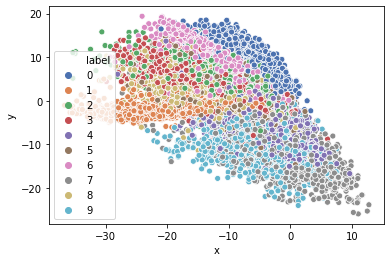

In [64]:
df = pd.DataFrame(list(zip(np.array(z_mean).transpose()[0], np.array(z_mean).transpose()[1], y_test)), 
                  columns =['x', 'y', 'label']) 

sns.scatterplot(data=df, x="x", y="y", hue="label",palette="deep",legend="full")

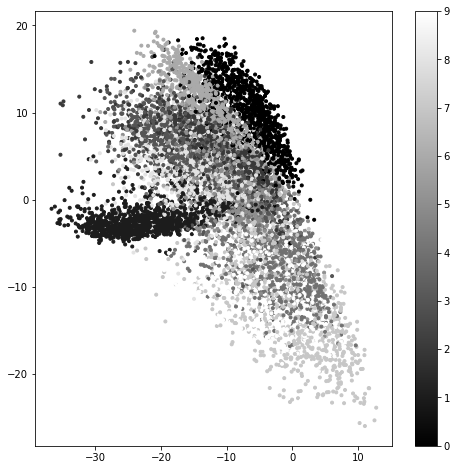

In [65]:
plt.figure(figsize=(8, 8))
plt.scatter(x=np.array(z_mean).transpose()[0], y=np.array(z_mean).transpose()[1], c=y_test, marker=".")
plt.colorbar()
plt.show()